In [15]:
import pandas as pd
import numpy as np
from math import log
from scipy.stats import pearsonr
from matplotlib import pyplot
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm

def calculate_spread(closing_prices_asset_1, closing_prices_asset_2):
    if len(closing_prices_asset_1) != len(closing_prices_asset_2):
        raise ValueError("Input lists must have the same length")
    
    returns_asset_1 = np.diff(closing_prices_asset_1) / closing_prices_asset_1[:-1]
    returns_asset_2 = np.diff(closing_prices_asset_2) / closing_prices_asset_2[:-1]

    spread = [a - b for a, b in zip(returns_asset_1, returns_asset_2)]

    return spread

In [16]:
def calculate_zscore(spread):
    mean_spread = np.mean(spread)
    std_dev_spread = np.std(spread)
    z_scores = [(x - mean_spread) / std_dev_spread for x in spread]
    
    return z_scores

In [17]:
def hedge_ratio(closing_prices_asset_2, closing_prices_asset_1):
    closing_prices_asset_1 = sm.add_constant(closing_prices_asset_1)
    model = sm.OLS(closing_prices_asset_2, closing_prices_asset_1).fit()
    return model.params[1]

This Hedge ration is: 4.60%
Lenght of the spread  199


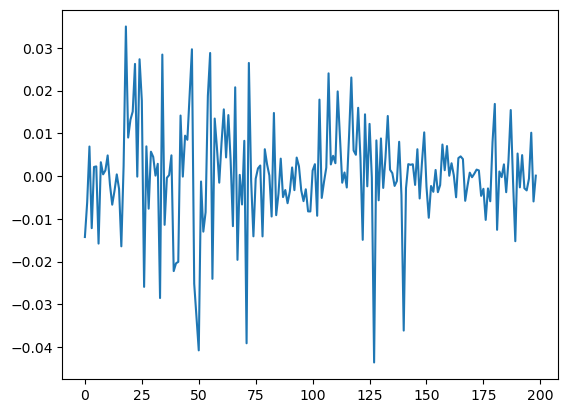

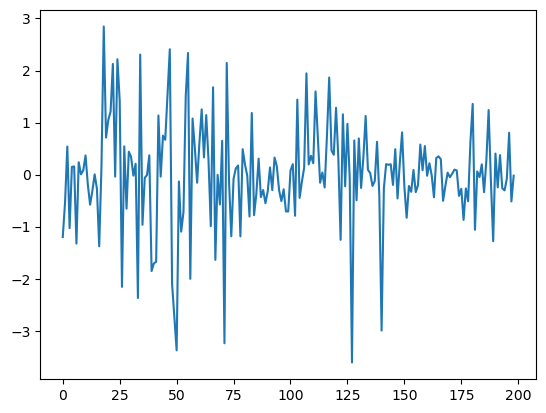

In [31]:
df_1 = pd.read_csv("../../data/btc_usd.csv")
df_2 = pd.read_csv("../../data/eth_usd.csv")
asset_1 = pd.DataFrame(df_1)
asset_2 = pd.DataFrame(df_2)

closing_prices_asset_1 = asset_1["close"]
closing_prices_asset_2 = asset_2["close"]

spread = calculate_spread(closing_prices_asset_1, closing_prices_asset_2)

zscore = calculate_zscore(spread)

hedge = hedge_ratio(closing_prices_asset_2, closing_prices_asset_1) *100

print(f"This Hedge ration is: {hedge:.2f}%")
print("Lenght of the spread ", len(spread))

pyplot.plot(spread)
pyplot.show()

pyplot.plot(zscore)
pyplot.show()

In [33]:
import streamlit as st
import pandas as pd
import numpy as np

chart_data = pd.DataFrame(np.random.randn(20, 3), columns=["a", "b", "c"])

st.line_chart(chart_data)

DeltaGenerator()

In [19]:
def is_stationary(spread, max_diff=5, significance_level=0.05):
    if len(spread) < max_diff + 1:
        
        return False

    result = adfuller(spread)
    p_value = result[1]

    if p_value <= significance_level:
        return True
    else:
        return False

In [20]:
df = is_stationary(spread)

df

True

In [21]:
def calculate_correlation(closing_prices_asset_1, closing_prices_asset_2):

    correlation_coefficient, _ = pearsonr(closing_prices_asset_1, closing_prices_asset_2)
    
    return correlation_coefficient

df = calculate_correlation(closing_prices_asset_1, closing_prices_asset_2)

df

0.8743423458448341

In [22]:
import numpy as np
import statsmodels.api as sm

def calculate_half_life(time_series):

    if not isinstance(time_series, np.ndarray):
        time_series = np.array(time_series)

    delta_y = np.diff(time_series)

    X = sm.add_constant(time_series[:-1])

    model = sm.OLS(delta_y, X).fit()

    half_life = -np.log(2) / model.params[1]

    return half_life

half_life = calculate_half_life(spread)
print(f"Half-life of the spread/z-score: {half_life:.2f} periods")


Half-life of the spread/z-score: 0.69 periods


In [23]:
import hurst

def calculate_hurst_exponent(time_series):

    if not isinstance(time_series, np.ndarray):
        time_series = np.array(time_series)

    H, _, _ = hurst.compute_Hc(time_series, kind='change', simplified=True)

    return H

hurst = calculate_hurst_exponent(spread)
print(f"Hurst Exponent: {hurst:.2f}")


Hurst Exponent: 0.36


In [24]:
def calculate_cointegration(closing_prices_asset_1, closing_prices_asset_2):

    if isinstance(closing_prices_asset_1, pd.Series):
        closing_prices_asset_1 = closing_prices_asset_1.values
    if isinstance(closing_prices_asset_2, pd.Series):
        closing_prices_asset_2 = closing_prices_asset_2.values

    result = sm.OLS(closing_prices_asset_1, sm.add_constant(closing_prices_asset_2)).fit()

    p_value = sm.tsa.adfuller(result.resid)[1]

    # Return True if cointegrated (p-value < 0.05), else False
    return p_value < 0.05


df = calculate_cointegration(closing_prices_asset_1, closing_prices_asset_2)
df

False